# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [56]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [57]:
# carregar base "tips" do seaborn

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [58]:
# modelo de regressão

reg = smf.ols('tip ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        21:10:15   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

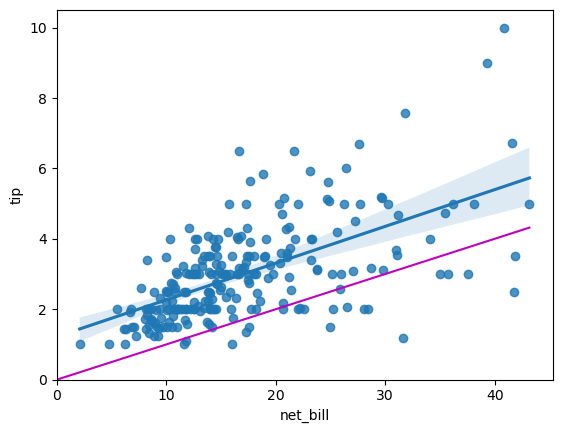

In [46]:
# gráfico de dispersão das duas variáveis 

sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-m', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [59]:
# modelo de regressão

reg1 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        21:11:16   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip_pct'>

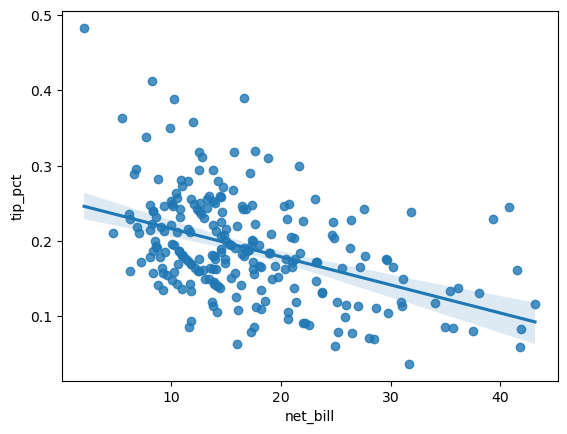

In [48]:
# gráfico de dispersão 

sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico vemos a relação entre o valor líquido da conta e o valor da gorjeta. Nesse caso, percebemos uma correlação positiva, quanto maior o valor líquido da conta, maior o valor da gorjeta.
Contudo, apesar de aumentar o valor da gorjeta, a proporção entre valor líquido da conta e valor da gorjeta diminui, como podemos ver no segundo gráfico. As gorjetas aumentam, mas não na mesma proporção da conta (correlação negativa).
Os dois R-quadrado são baixos, porém o primeiro explica melhor os erros do modelo.  

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [60]:
# valor predito pelo modelo reg1 - para tip_pct

pred = reg1.fittedvalues
pred.to_frame()

,0
0,0.207087
1,0.251951
2,0.197684
3,0.180107
4,0.176358
...,...
239,0.163268
240,0.150546
241,0.178264
242,0.206534


In [61]:
# criar df com dados preditos da tip_pct e com coluna de net_bill
df = pd.concat([pred, tips['net_bill']], axis=1)
df.columns = ['tips_pct_pred', 'net_bill']
df

,tips_pct_pred,net_bill
0,0.207087,15.98
1,0.251951,8.68
2,0.197684,17.51
3,0.180107,20.37
4,0.176358,20.98
...,...,...
239,0.163268,23.11
240,0.150546,25.18
241,0.178264,20.67
242,0.206534,16.07


In [62]:
# valor predito para tip como tip_pct * net_bill

df['tip_pred'] = df['tips_pct_pred'] * df['net_bill']
df

,tips_pct_pred,net_bill,tip_pred
0,0.207087,15.98,3.309254
1,0.251951,8.68,2.186938
2,0.197684,17.51,3.461450
3,0.180107,20.37,3.668785
4,0.176358,20.98,3.699998
...,...,...,...
239,0.163268,23.11,3.773120
240,0.150546,25.18,3.790751
241,0.178264,20.67,3.684707
242,0.206534,16.07,3.319003


In [63]:
tips['tip_pred'] = df['tip_pred']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998


In [67]:
# cálculo da correlação (r) entre o valor da gorgeta e sua predição

r = tips[['tip_pred', 'tip']].corr().iloc[0,1]
r

0.34802852906807363

In [68]:
# o coeficiente de determinação (R-quadrado) é a correlação ao quadrado

r**2

0.12112385704528697

O $R^2$ do modelo para gorjetas preditas a partir de ``tips_pct_pred`` * ``net_bill`` é aproximadamente 12%.
O $R^2$ do modelo para gorjetas preditas a partir de ``net_bill`` é aproximadamente 33%. 